In [2]:
"""import bibliotek"""
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

## Dane

In [3]:
#przykałdowe dane
sentences = []

for i in range(10):
    sentence = list (range(10))
    sentences.append(sentence)

In [4]:
sentences

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [5]:
np.random.randint(10) #ganerator liczb losowych

1

In [6]:
sentences = []

for i in range(1000000):
    start = np.random.randint(0,20)
    finish = start + np.random.randint(1,15)
    sentence = [str(x) for x in  list (range(start,finish))] #rzutowanie na stringa
    sentences.append(sentence)

In [7]:
sentences

[['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'],
 ['5'],
 ['3', '4', '5', '6', '7'],
 ['18', '19', '20'],
 ['14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'],
 ['10', '11'],
 ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
 ['7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
 ['16', '17', '18', '19', '20', '21', '22', '23'],
 ['12', '13', '14'],
 ['18', '19', '20', '21', '22', '23', '24', '25'],
 ['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'],
 ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
 ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
 ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'],
 ['2', '3', '4'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
 ['7', '8', '9', '10', '11', '12', '13', '14', '15',

## Model Word2Vec

In [8]:
model = Word2Vec (sentences , size = 10, window = 5, min_count = 1 ) 
#sentences - zdania, 
#size -rozmiar wektora, 
#window - szerokosc okno do kontekstu, min wartosc to slowa sa podobne, wieksza wartosc słowa  
#min_count ile razy musi byc slowo aby było brane pod uwage

In [9]:
model.wv['1'] # oczyt pierwszego wektora

array([-5.6235166 ,  2.9620352 , -0.22498102, -1.2980384 , -3.8562148 ,
       -2.3845482 ,  6.3394303 , -3.5346403 ,  3.9804914 ,  0.6333904 ],
      dtype=float32)

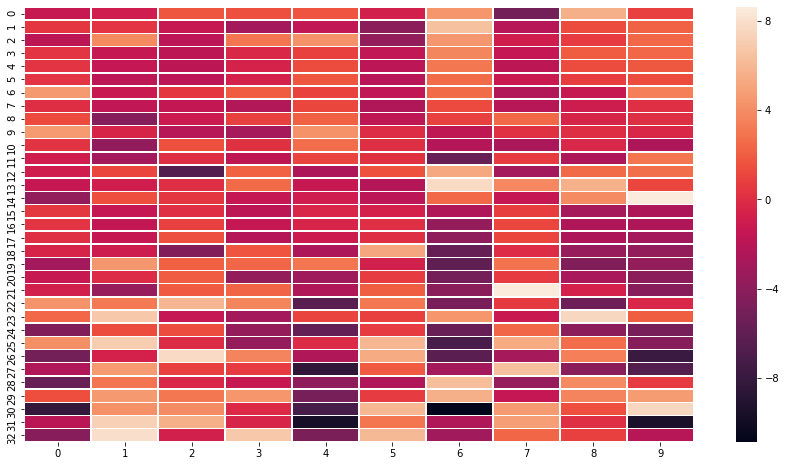

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(model.wv [model.wv.vocab],linewidths= 0.5);

In [25]:
"""funckja pomocnicza"""
def plot_heatmap(model):
    plt.figure(figsize = (15,8))
    sns.heatmap(model.wv [model.wv.vocab],linewidths= 0.5);

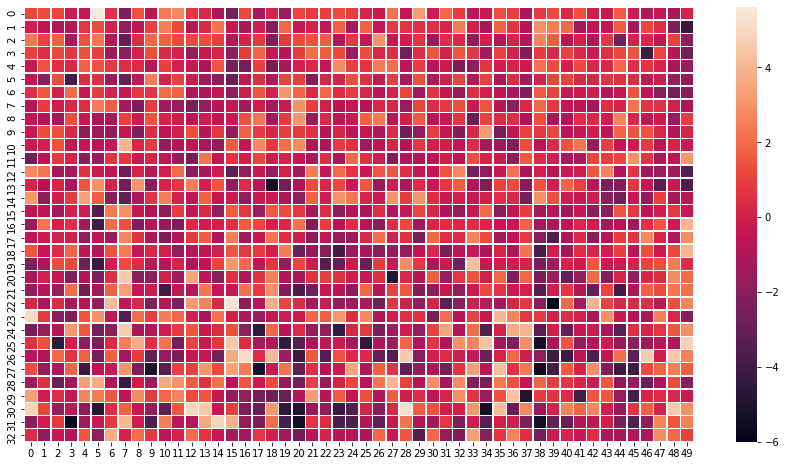

In [26]:
plot_heatmap (Word2Vec (sentences , size = 50, window = 5 ) )

## Wizualizacja - PCA

In [27]:
X = model.wv[model.wv.vocab]
#X.shape = 10 wymiarow
pca_model = PCA(n_components=2) #redukcja do 2 wymiarów
result = pca_model.fit_transform(X)

In [28]:
result [:,0] #wyciaganie danych

array([-8.055188 , -8.622336 , -7.8293753, -7.245474 , -6.845784 ,
       -6.1970096, -6.321265 , -4.503632 , -3.5035973, -2.770733 ,
       -0.9317845,  1.0957136, -7.576856 , -7.4614615, -7.68288  ,
        1.6180918,  2.7694607,  3.4520874,  5.720819 ,  6.1817145,
        5.854216 ,  6.940478 ,  7.5078926, -7.253989 ,  8.662064 ,
        7.907802 ,  8.562845 , 10.324069 , -6.4998083, -5.389244 ,
        9.820136 , 11.633737 ,  6.6392984], dtype=float32)

In [29]:
result [:,1] #wyciaganie danych

array([ 1.6687827,  0.6909294,  0.99071  , -0.9994793, -1.8915242,
       -2.7599552, -2.88168  , -4.0360427, -5.270138 , -6.375405 ,
       -5.832252 , -5.574625 ,  3.5891032,  4.139413 ,  4.2749147,
       -4.9535937, -4.7341585, -4.5904593, -3.6655064, -2.8890686,
       -3.1879036, -2.8036377,  0.7158511,  5.225817 , -1.0864257,
        0.0744048,  1.8469502,  2.8750029,  6.460516 ,  8.521702 ,
        7.4975767,  6.7446675,  8.21551  ], dtype=float32)

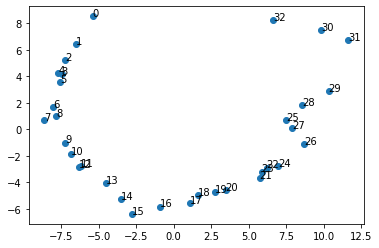

In [30]:
plt.scatter (result [:,0],result [:,1]);

words = list (model.wv.vocab)#pokazuje wartosci przy pkt
for i, word in enumerate (words):
    plt.annotate(word, xy =( result [i, 0],result [i, 1]))

In [31]:
"""funckja pomocnicza"""
def plt_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2) #redukcja do 2 wymiarów
    result = pca_model.fit_transform(X)
    plt.scatter (result [:,0],result [:,1]);
    words = list (model.wv.vocab)

    for i, word in enumerate (words):
        plt.annotate(word, xy =( result [i, 0],result [i, 1]))

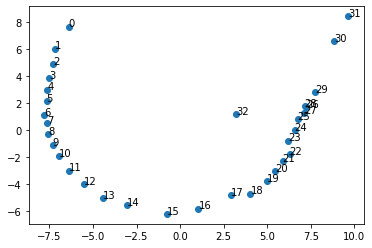

In [32]:
plt_pca(Word2Vec (sentences , size = 100, window = 10 ))

## Podobne słowa

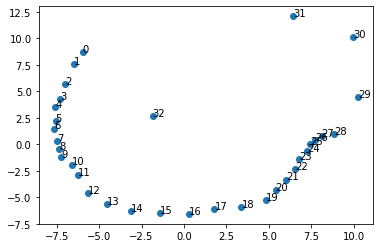

In [39]:
plt_pca(Word2Vec (sentences , size = 300, window = 3 ))

In [35]:
model.wv.most_similar('20', topn = 3)
# 20 slowo
#topn=3 3 najpbardziiej podobne słowa do 20
#wykryl 19,18 i 23

[('19', 0.9833049774169922),
 ('18', 0.9407892227172852),
 ('23', 0.930006206035614)]

In [48]:
model.wv.most_similar(positive=['10','8'], negative= ['2'],topn = 3)

[('11', 0.7941921949386597),
 ('9', 0.6896966099739075),
 ('13', 0.6023299694061279)]